# 05 — Interferometer / Demodulation Methods (Figures)

Generates two signal-processing figures for the paper:

- FFT of a phase-modulated carrier (θ-drive)
- A simple lock-in demodulation sketch

Outputs are written into `paper2/figs/`.


In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Resolve repo root and output directory
repo_root = Path.cwd().resolve()
for _ in range(10):
    if (repo_root / 'paper2').exists() and (repo_root / 'src').exists():
        break
    repo_root = repo_root.parent

figures_dir = repo_root / 'paper2' / 'figs'
figures_dir.mkdir(parents=True, exist_ok=True)
print('Figures dir:', figures_dir)

Figures dir: C:\workspace\Physics\X-theta-framework\paper2\figs


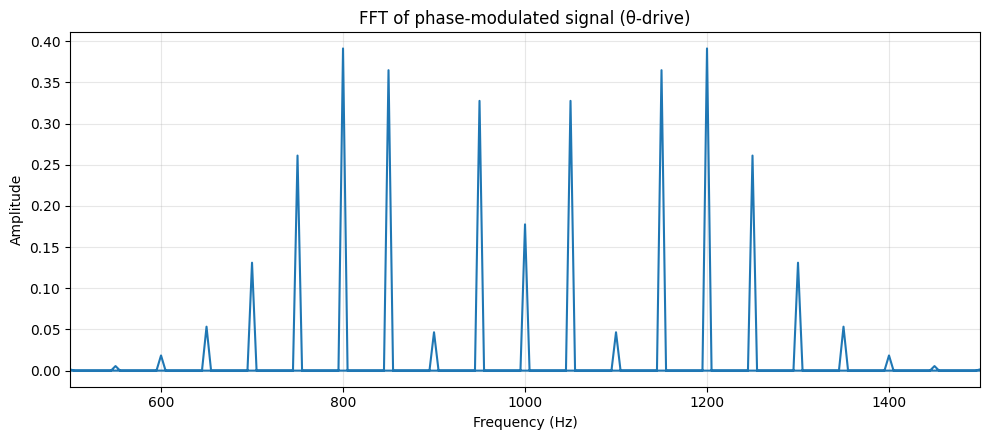

Saved: C:\workspace\Physics\X-theta-framework\paper2\figs\fft_theta_drive.png


In [2]:
# --- Generate fft_theta_drive.png ---
f_carrier = 1000.0  # Hz
f_mod = 50.0        # Hz
beta = 5.0          # modulation index
T = 0.2             # seconds
fs = 10000.0        # sampling Hz
t = np.arange(0.0, T, 1.0 / fs)

signal = np.cos(2 * np.pi * f_carrier * t + beta * np.sin(2 * np.pi * f_mod * t))
N = len(signal)
yf = fft(signal)
xf = fftfreq(N, 1.0 / fs)

plt.figure(figsize=(10, 4.5))
plt.plot(xf, 2.0 / N * np.abs(yf))
plt.xlim(f_carrier - 10 * f_mod, f_carrier + 10 * f_mod)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT of phase-modulated signal (θ-drive)')
plt.grid(True, alpha=0.3)

plot_fft = figures_dir / 'fft_theta_drive.png'
plt.tight_layout()
plt.savefig(plot_fft, dpi=160)
plt.show()
print('Saved:', plot_fft)

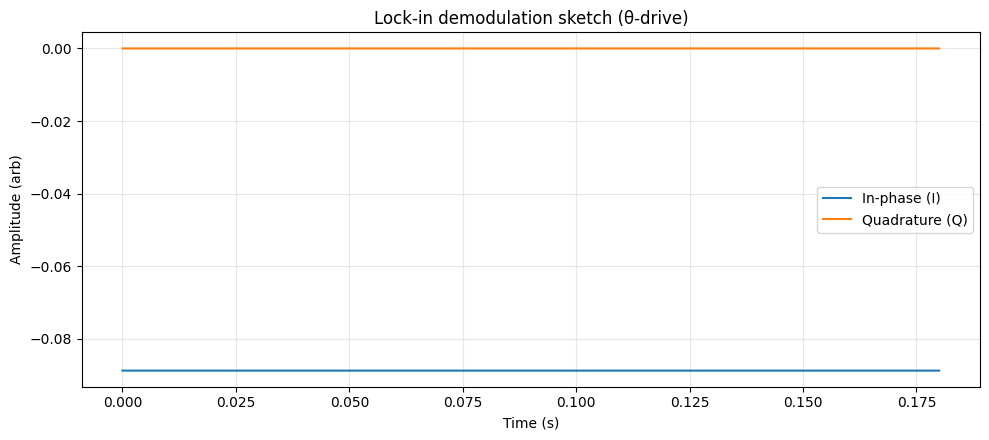

Saved: C:\workspace\Physics\X-theta-framework\paper2\figs\lockin_theta_drive.png


In [3]:
# --- Generate lockin_theta_drive.png ---
ref_I = np.cos(2 * np.pi * f_carrier * t)
ref_Q = np.sin(2 * np.pi * f_carrier * t)
I_mix = signal * ref_I
Q_mix = signal * ref_Q

def moving_average(x: np.ndarray, n: int = 200) -> np.ndarray:
    c = np.cumsum(x, dtype=float)
    c[n:] = c[n:] - c[:-n]
    return c[n - 1 :] / n

I_f = moving_average(I_mix)
Q_f = moving_average(Q_mix)
t_f = t[: len(I_f)]
_phase = np.unwrap(np.arctan2(Q_f, I_f))

plt.figure(figsize=(10, 4.5))
plt.plot(t_f, I_f, label='In-phase (I)')
plt.plot(t_f, Q_f, label='Quadrature (Q)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (arb)')
plt.title('Lock-in demodulation sketch (θ-drive)')
plt.grid(True, alpha=0.3)
plt.legend()

plot_lockin = figures_dir / 'lockin_theta_drive.png'
plt.tight_layout()
plt.savefig(plot_lockin, dpi=160)
plt.show()
print('Saved:', plot_lockin)